<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Data Gathering

In [2]:
df1 = pd.read_csv("car_dataset.csv")

In [3]:
df = df1.copy()

# Data Preparation

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [5]:
fuel_type = pd.get_dummies(df['Fuel_Type'])
fuel_type

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [6]:
df = pd.concat([df,fuel_type],axis=1)

In [7]:
df.drop('Fuel_Type',axis=1,inplace=True)

In [8]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,0,0,1


In [9]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [10]:
df.Seller_Type = df['Seller_Type'].map(lambda x: 0 if x == 'Dealer' else 1)

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,0,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,0,Manual,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,Manual,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,Manual,0,0,0,1
4,swift,2014,4.60,6.87,42450,0,Manual,0,0,1,0


Transmission feature:
transmission is manual if Transmission_Manual = 1
transmission is automatic if Transmission_Manual = 0
Seller_Type feature:
Seller_Type is Individual if Seller_Type_Individual = 1
Seller_Type is dealer if Seller_Type_Individual = 0

In [12]:
df.Transmission = df['Transmission'].map(lambda x: 1 if x == 'Manual' else 0)

In [13]:
df.rename(columns={'Seller_Type': 'Seller_Type_Individual','Transmission':'Transmission_Manual'}, inplace= True)

In [14]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type_Individual,Transmission_Manual,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,0,1,0,0,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,1,0,0,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,0,1,0
297,brio,2015,4.00,5.90,60000,0,1,0,0,0,1
298,city,2009,3.35,11.00,87934,0,1,0,0,0,1
299,city,2017,11.50,12.50,9000,0,1,0,0,1,0


In [15]:
df.corr().loc[:,'Selling_Price'].sort_values()

Seller_Type_Individual   -0.550724
Petrol                   -0.540571
Transmission_Manual      -0.367128
Owner                    -0.088344
CNG                      -0.025164
Kms_Driven                0.029187
Year                      0.236141
Diesel                    0.552339
Present_Price             0.878983
Selling_Price             1.000000
Name: Selling_Price, dtype: float64

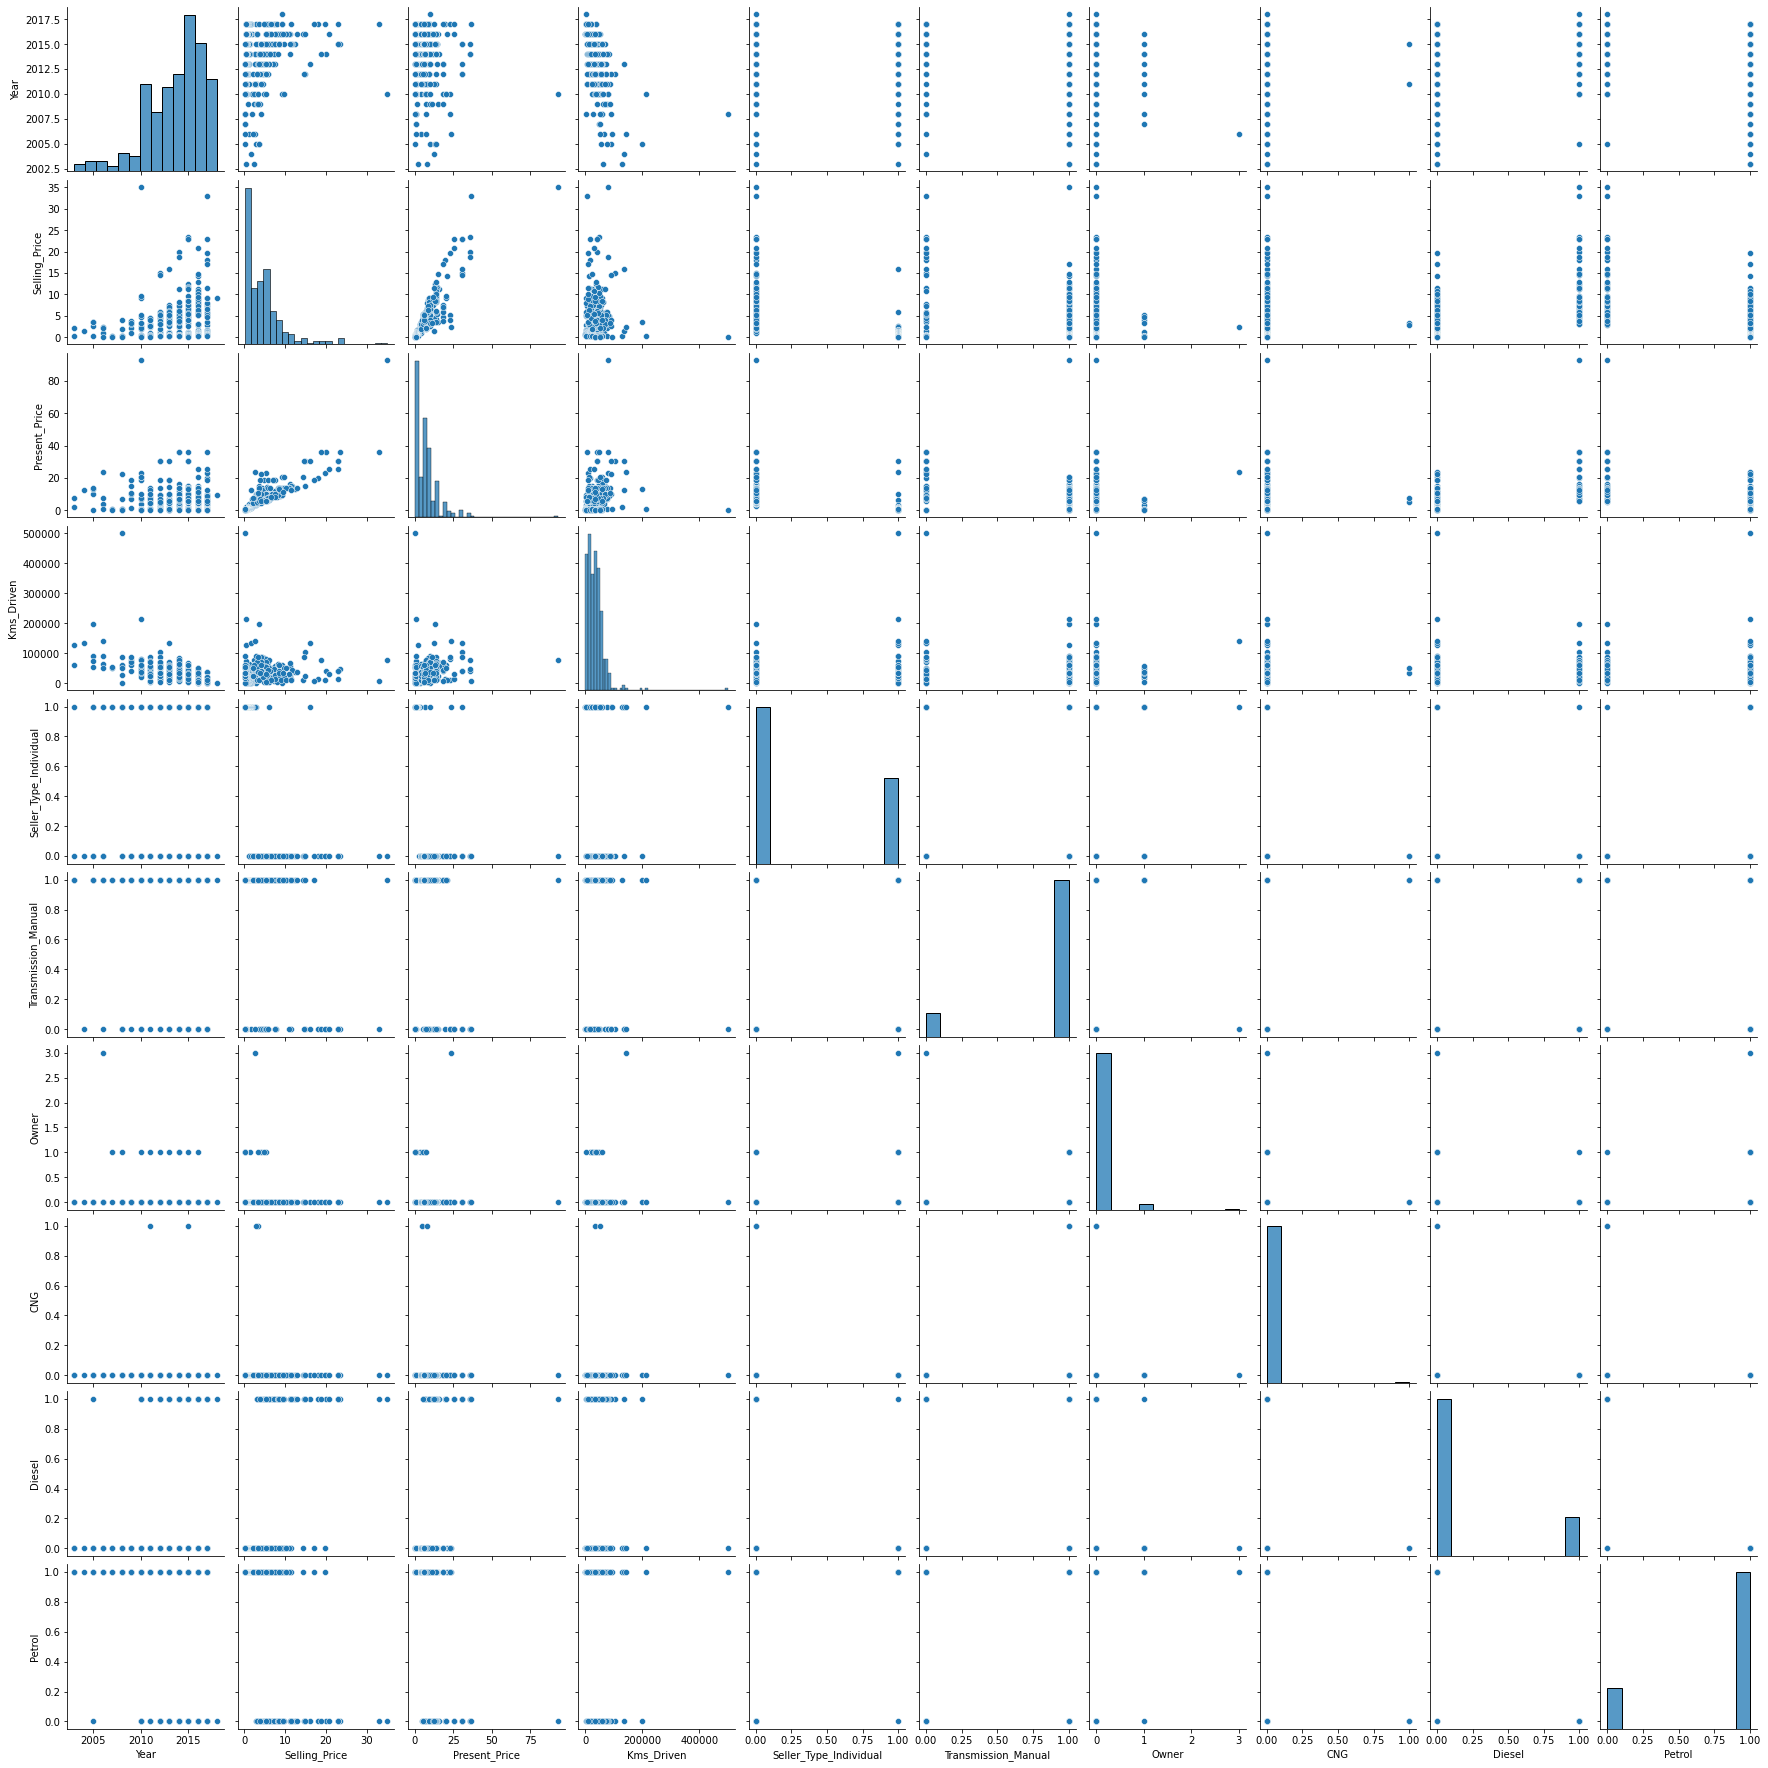

In [16]:
sns.pairplot(df)

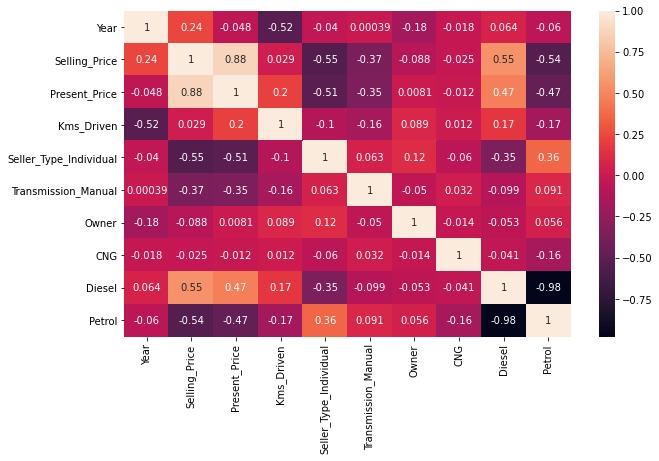

In [17]:
sns.heatmap(df.corr(),annot=True);

### Splitting data into training and testing

In [19]:
X = df.drop(['Selling_Price','Car_Name'],axis=1)
X

,Year,Present_Price,Kms_Driven,Seller_Type_Individual,Transmission_Manual,Owner,CNG,Diesel,Petrol
0,2014,5.59,27000,0,1,0,0,0,1
1,2013,9.54,43000,0,1,0,0,1,0
2,2017,9.85,6900,0,1,0,0,0,1
3,2011,4.15,5200,0,1,0,0,0,1
4,2014,6.87,42450,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,0,1,0
297,2015,5.90,60000,0,1,0,0,0,1
298,2009,11.00,87934,0,1,0,0,0,1
299,2017,12.50,9000,0,1,0,0,1,0


In [20]:
y= df['Selling_Price']

In [21]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##  Model Building (Linear Regression)

In [26]:
from sklearn.model_selection import cross_validate, cross_val_score

In [27]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [31]:
scores = pd.DataFrame(scores, index = range(1,11))

In [32]:
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.007002,0.004999,0.756990,-1.865587,-16.791329,-4.097722
2,0.006001,0.005000,0.753600,-1.196430,-2.237548,-1.495843
3,0.004999,0.003999,0.560359,-1.654734,-5.510190,-2.347379
4,0.010001,0.004000,0.855715,-1.044287,-3.359209,-1.832814
5,0.003999,0.003000,0.855422,-0.730953,-0.826655,-0.909206
6,0.005000,0.003000,0.841160,-1.561542,-9.217677,-3.036063
7,0.004000,0.003999,0.427970,-1.261253,-3.500960,-1.871085
8,0.004000,0.003999,0.886754,-1.048835,-1.952622,-1.397362
9,0.004000,0.004000,0.914236,-1.169115,-2.203859,-1.484540
10,0.003999,0.004000,0.870811,-0.806595,-1.155715,-1.075042


# Interpret the model

In [35]:
scores.iloc[:,2:].mean()

test_r2                             0.772302
test_neg_mean_absolute_error       -1.233933
test_neg_mean_squared_error        -4.675576
test_neg_root_mean_squared_error   -1.954706
dtype: float64

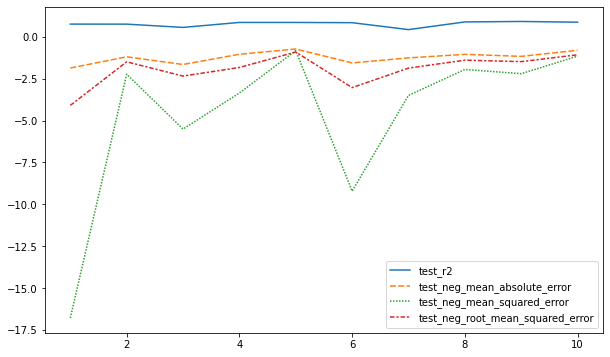

In [38]:
sns.lineplot(data = scores.iloc[:,2:]);

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = lm.predict(X_test)
y_pred

array([ 2.55709648,  8.34000036,  6.54664993, -1.37449863,  9.02374359,
        7.59668363,  1.25570562,  1.01463285,  1.38639654,  7.67745267,
        9.64969855,  0.50434762,  8.31254208,  3.25280685,  7.12939553,
        2.70992328,  0.6986526 , 10.85081769,  1.79628655,  2.47376453,
        0.56575139,  8.52770778,  7.04501422,  2.92923943,  0.75561407,
        3.74220607,  4.99519211,  2.82326414,  2.15110995,  1.72525059,
        0.51812405,  9.08673669, -0.54815231,  2.23151691,  8.69829927,
        4.45740292,  6.76554766,  7.37699926,  2.64228299,  7.87576769,
        3.79082329,  3.15516603,  4.48869732,  0.37247614,  7.62494029,
        0.4067942 ,  7.18988611, 10.50961946,  3.20758011,  5.57124706,
        6.48828424,  2.27534991, 20.42422238, 17.10179579,  7.45976012,
        9.32188979,  4.7629861 ,  9.20724512,  1.93463384,  7.42168746,
        0.17744758, -2.07338322,  2.06359489, -1.6573665 ,  4.66645644,
        1.89270445, 20.2195984 , 18.26047842,  5.54118425, -1.16

In [44]:
y_train_pred = lm.predict(X_train)
y_train_pred

array([ 8.4094442 , -0.75248865,  6.15992602,  3.55578442, 10.66870624,
        2.71699998, 11.45029327,  2.27064166, -0.24671125,  0.34636611,
        5.72439238,  1.31673197,  3.28874528,  0.29242002, 16.53705598,
        4.39961991, -0.87653653, 41.20658712, 10.02820005,  0.40988212,
        4.39394223,  7.64530092,  2.10320763,  1.20240157,  6.43452873,
        7.04292122,  0.84878858,  0.69575583,  5.66362289,  4.1447321 ,
       -0.84450578,  5.40175992,  6.60101198,  1.68319423,  0.41293001,
        1.65581387,  6.24009586,  6.18729582,  1.04008482,  2.00040812,
       -0.70534469,  7.12113359,  1.40875485,  5.77924891, -3.85442979,
        1.84400252,  6.78266998,  5.17125363,  1.62371633,  6.55667555,
        8.17415015,  9.61842176,  6.34858623,  0.84129178,  3.19878947,
        7.60507699,  5.03946835, -2.80017515,  5.3031336 ,  6.39346136,
       -3.05895844,  4.72127924,  4.83947214,  3.20419121,  7.7264069 ,
        2.91125472,  1.72956558,  0.93205007, -0.5168777 ,  1.12

In [45]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lms =pd.DataFrame(lm_scores)
lms

,lm_train,lm_test
rmse,1.671364,1.979404
mae,1.107533,1.280568
mse,2.793458,3.918042
R2,0.889346,0.853542


In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 220, random_state=42 )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

 rmse score is : 1.0037, r2 score is 0.9623


# Model Evaluation

# Regularization

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()

In [51]:
scaler.fit(X_train) 

MinMaxScaler()

In [52]:
X_train = scaler.transform(X_train)


In [53]:
X_train


array([[0.85714286, 0.11201563, 0.19377882, ..., 0.        , 1.        ,
        0.        ],
       [0.42857143, 0.01389341, 0.18588235, ..., 0.        , 0.        ,
        1.        ],
       [0.85714286, 0.07630522, 0.20470588, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.78571429, 0.0323456 , 0.07529412, ..., 0.        , 0.        ,
        1.        ],
       [0.57142857, 0.10344079, 0.32395765, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.01421904, 0.01647059, ..., 0.        , 0.        ,
        1.        ]])

In [54]:
X_test = scaler.transform(X_test)

In [55]:
X_test

array([[ 9.28571429e-01,  1.08542277e-03,  1.10588235e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 9.28571429e-01,  1.42516010e-01,  4.93176471e-02,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 6.42857143e-01,  9.69282536e-02,  2.80000000e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.71428571e-01,  1.08542277e-03,  1.62352941e-01,
         1.00000000e+00,  1.00000000e+00,  3.33333333e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 7.14285714e-01,  1.96895691e-01,  1.85887059e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 8.57142857e-01,  9.17182242e-02,  1.97021176e-01,
         0.00000000e+00,  1.00000000e+00,  0.000000

In [56]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression()

In [58]:
y_pred = lm.predict(X_test)


In [59]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [60]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8485132644713372
MAE 		: 1.3168
MSE 		: 4.052571124999999
RMSE 		: 2.013099879539016


In [61]:
y_train_pred = lm.predict(X_train)

eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8883005020761412
MAE 		: 1.1412313432835821
MSE 		: 2.8198616604477613
RMSE 		: 1.679244371867228


In [62]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,1.679244,2.013100
mae,1.141231,1.316800
mse,2.819862,4.052571
R2,0.888301,0.848513


# Ridge

In [63]:
from sklearn.linear_model import Ridge


In [64]:
ridge_model = Ridge(alpha=1)

In [65]:

ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [66]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8133836233784306
MAE 		: 1.4082162997166887
MSE 		: 4.711143518349163
RMSE 		: 2.170516878153488


In [67]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,2.170517,2.013100
mae,1.408216,1.316800
mse,4.711144,4.052571
R2,0.813384,0.848513


In [68]:
from sklearn.linear_model import RidgeCV

In [69]:
alpha_space = np.linspace(0.01, 1, 100)  # bu aralığı azaltıp arttırabilirsin. 
alpha_space 

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [70]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [71]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [72]:
ridge_cv_model.alpha_

0.16

In [73]:
y_pred = ridge_cv_model.predict(X_test)

In [74]:

eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8525502814414168
MAE 		: 1.312464219948201
MSE 		: 3.944572900950978
RMSE 		: 1.98609488719723


In [75]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8839092138594162
MAE 		: 1.1452662097290616
MSE 		: 2.930720039513703
RMSE 		: 1.7119345897299063


# Lasso

In [76]:
from sklearn.linear_model import Lasso, LassoCV

In [78]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000) 


In [79]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [80]:
lasso_cv_model.alpha_


0.03

In [81]:

y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8778796401496509
MAE 		: 1.139657906058614
MSE 		: 3.082937050771901
RMSE 		: 1.7558294480876842


In [82]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8593693778463097
MAE 		: 1.286392803315016
MSE 		: 3.76214852503041
RMSE 		: 1.9396258724378808


## Elastic-Net 

In [83]:
from sklearn.linear_model import ElasticNet, ElasticNetCV


In [84]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)


In [86]:
elastic_cv_model.fit(X_train,y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [87]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8573340573395186
MAE 		: 1.2929722332105842
MSE 		: 3.816597392036203
RMSE 		: 1.95361137180254
